# Synthetic generations

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">The function to generate analytical track is <b>generate</b>.</div>

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports

The following imports are necessary for all of the examples.

In [2]:
import math
import matplotlib.pyplot as plt

import tracklib as tkl

## Generate analytical track

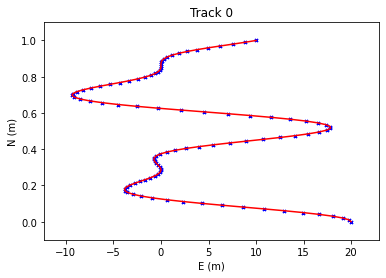

-------------------------------------
GPS track #0 of user 0:
-------------------------------------
  Nb of pt(s):   100
  Ref sys id   : ENU
  Starting at  : 31/01/2018 11:17:01
  Ending at    : 31/01/2018 11:18:40
  Duration     :  99.000 s
  Length       : 94.014 m
-------------------------------------



In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
dateini = tkl.ObsTime.readTimestamp("2018-01-31 11:17:00")
datefin = tkl.ObsTime.readTimestamp("2018-01-31 11:18:40")

def x_t(t):
    return 10 * math.cos(4 * math.pi * t)*(1 + math.cos(3.5 * math.pi * t))
def y_t(t):
    return t
def z_t(t):
    return 5*t
        
t = tkl.generate(x_t, y_t, z_t, date_ini=dateini, date_fin=datefin, 
             verbose = False)
t.plot('r-')
t.plot(type='POINT', sym='bx', append=True, pointsize=10)
plt.show()

t.summary()

## Generate field of tracks from integral curves of vector field

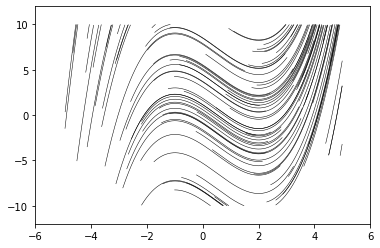

In [4]:
def vx(x,y):
    return 1.0/100.0
def vy(x,y):
    return (x**2-x-2)/100.0

TRACKS = tkl.generateDataSet(vx, vy, 100, (-5,-10), (5,10))

for i in range(len(TRACKS)):
    track = TRACKS[i]
    plt.plot(track.getX(), track.getY(), 'k-', linewidth=0.5)

plt.xlim([-6, 6])
plt.ylim([-12, 12])
plt.show()